In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
df=pd.read_csv("C:/Users/USER/Documents/tiktok_dataset.csv")
df.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7.017666e+09,59.0,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4.014381e+09,32.0,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,"3,claim,9859838091,31,""someone shared with me ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,claim,1866847991,25,""someone shared with me ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,claim,7.105231e+09,19.0,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [73]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  object 
 1   claim_status              17192 non-null  object 
 2   video_id                  17490 non-null  float64
 3   video_duration_sec        17490 non-null  float64
 4   video_transcription_text  17192 non-null  object 
 5   verified_status           17490 non-null  object 
 6   author_ban_status         17490 non-null  object 
 7   video_view_count          17192 non-null  float64
 8   video_like_count          17192 non-null  float64
 9   video_share_count         17192 non-null  float64
 10  video_download_count      17192 non-null  float64
 11  video_comment_count       17192 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.749000e+04,17490.000000,17192.000000,17192.000000,17192.000000,17192.000000,17192.000000
mean,5.631472e+09,32.413322,253531.768846,84165.980572,16769.292752,1046.778385,346.866624
std,2.536675e+09,16.263228,322057.058498,133287.020807,32144.119566,2002.501920,795.663021
min,1.234959e+09,5.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,3.433069e+09,18.000000,4904.000000,807.750000,115.000000,7.000000,1.000000
50%,5.633289e+09,32.000000,9934.500000,3356.500000,715.000000,45.000000,9.000000
75%,7.848482e+09,47.000000,501372.250000,125016.750000,18208.500000,1143.250000,285.250000
max,9.999873e+09,60.000000,999673.000000,657830.000000,256130.000000,14417.000000,9599.000000


In [74]:
df.isnull().sum()

#                              0
claim_status                2190
video_id                    1892
video_duration_sec          1892
video_transcription_text    2190
verified_status             1892
author_ban_status           1892
video_view_count            2190
video_like_count            2190
video_share_count           2190
video_download_count        2190
video_comment_count         2190
dtype: int64

In [75]:
numeric_cols = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']
for x in numeric_cols:
    df[x] = df[x].fillna(df[x].median())

    

In [76]:

df = df.dropna(subset=['video_id', 'claim_status'])

In [77]:
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [78]:
df = df.drop_duplicates()


<Axes: title={'center': 'Claim Status Distribution'}, xlabel='claim_status'>

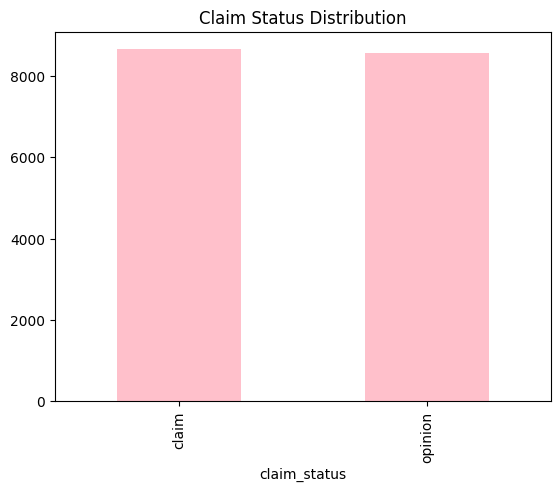

In [79]:

df['claim_status'].value_counts().plot(kind='bar', title='Claim Status Distribution',color='pink')


<Axes: xlabel='author_ban_status'>

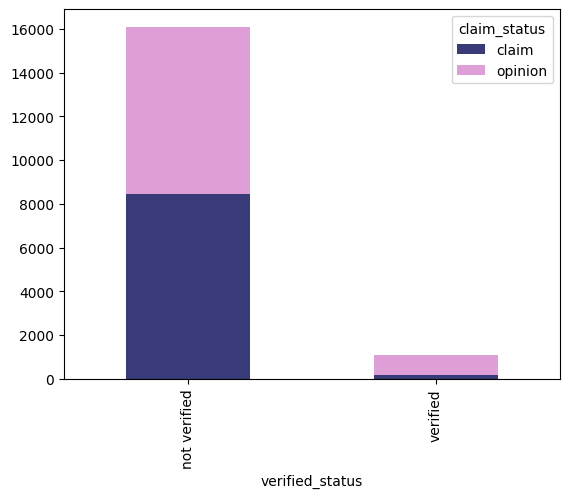

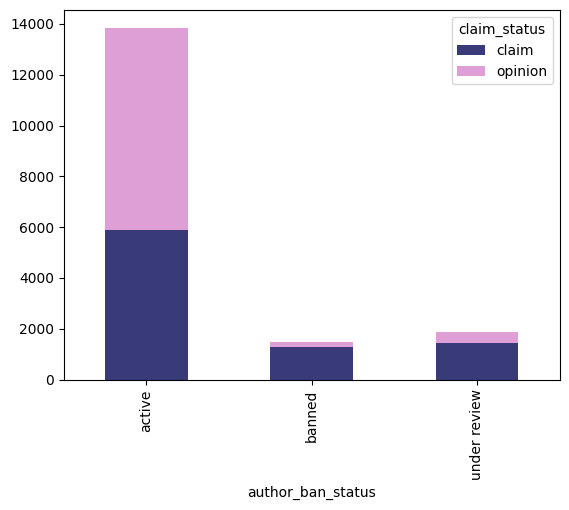

In [80]:
pd.crosstab(df['verified_status'], df['claim_status']).plot(kind='bar', stacked=True,colormap='tab20b')
pd.crosstab(df['author_ban_status'], df['claim_status']).plot(kind='bar', stacked=True,colormap='tab20b')

<Axes: >

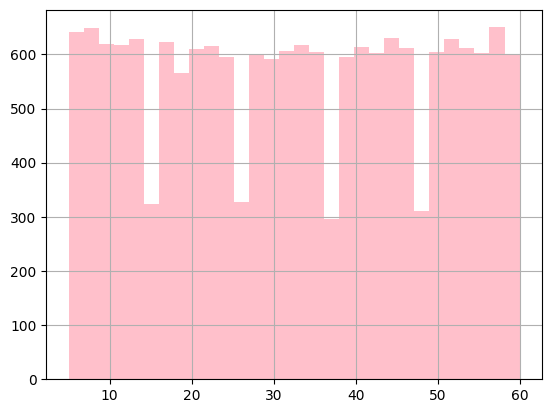

In [81]:
df['video_duration_sec'].hist(bins=30,color='pink')


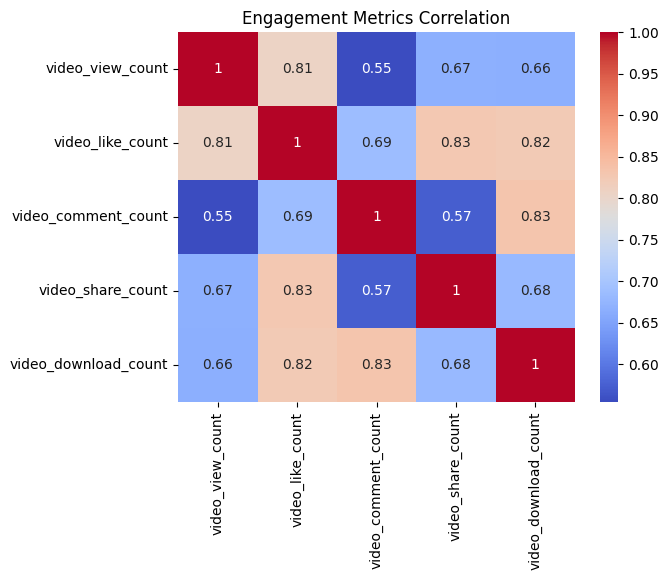

In [82]:

cols = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Engagement Metrics Correlation')
plt.show()

In [83]:

verified_percent = df['verified_status'].value_counts(normalize=True) * 100
claim_percent = df[df['claim_status'] == 'claimed']['verified_status'].value_counts(normalize=True) * 100

print("Verified status percentage for all videos:")
print(verified_percent)

print("\nVerified status percentage for claimed videos:")
print(claim_percent)



Verified status percentage for all videos:
verified_status
not verified    93.619125
verified         6.380875
Name: proportion, dtype: float64

Verified status percentage for claimed videos:
Series([], Name: proportion, dtype: float64)


In [84]:
df['like_rate'] = df['video_like_count'] / df['video_view_count']
df.groupby('claim_status')['like_rate'].mean()


claim_status
claim      0.332508
opinion    0.219789
Name: like_rate, dtype: float64

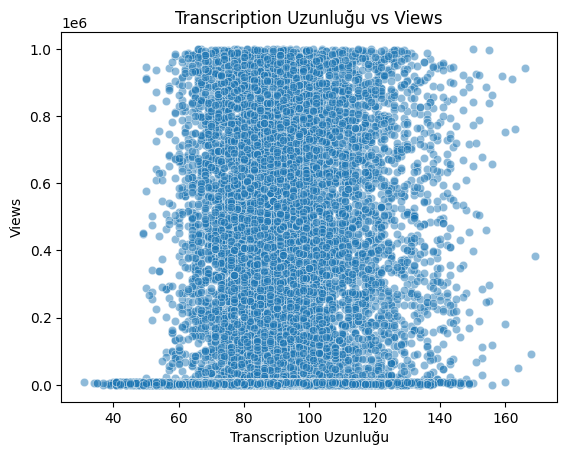

In [85]:
df['video_transcription_length'] = df['video_transcription_text'].astype(str).apply(len)

# transcription uzunluğu ilə views arasında əlaqə
sns.scatterplot(data=df, x='video_transcription_length', y='video_view_count', alpha=0.5)
plt.title('Transcription Uzunluğu vs Views')
plt.xlabel('Transcription Uzunluğu')
plt.ylabel('Views')
plt.show()

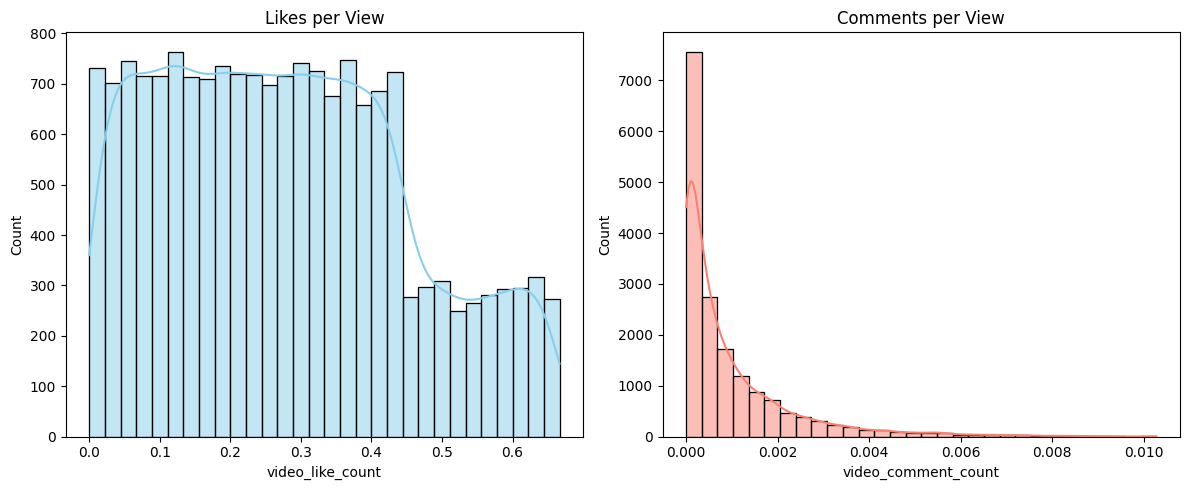

In [86]:
# Engagement rate sütunları əlavə edək
df['video_like_count'] = df['video_like_count'] / df['video_view_count'].replace(0, pd.NA)
df['video_comment_count'] = df['video_comment_count'] / df['video_view_count'].replace(0, pd.NA)

# Vizualizasiya
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['video_like_count'].dropna(), bins=30, ax=axs[0], kde=True, color='skyblue')
axs[0].set_title('Likes per View')

sns.histplot(df['video_comment_count'].dropna(), bins=30, ax=axs[1], kde=True, color='salmon')
axs[1].set_title('Comments per View')

plt.tight_layout()
plt.show()


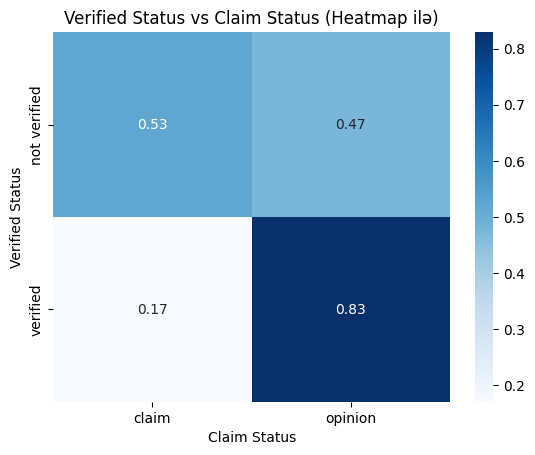

In [87]:

heat_data = pd.crosstab(df['verified_status'], df['claim_status'], normalize='index')
sns.heatmap(heat_data, annot=True, cmap='Blues', fmt='.2f')
plt.title('Verified Status vs Claim Status (Heatmap ilə)')
plt.ylabel('Verified Status')
plt.xlabel('Claim Status')
plt.show()


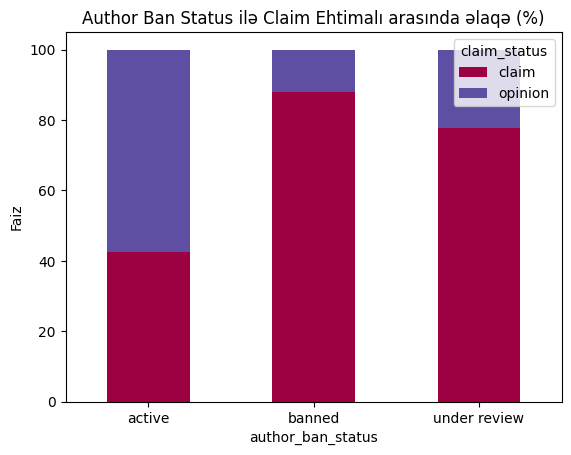

In [88]:
claim_ban = pd.crosstab(df['author_ban_status'], df['claim_status'], normalize='index') * 100
claim_ban.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Author Ban Status ilə Claim Ehtimalı arasında əlaqə (%)')
plt.ylabel('Faiz')
plt.xticks(rotation=0)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_25912\3196098452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='claim_status', y='video_duration_sec', palette='Set3')


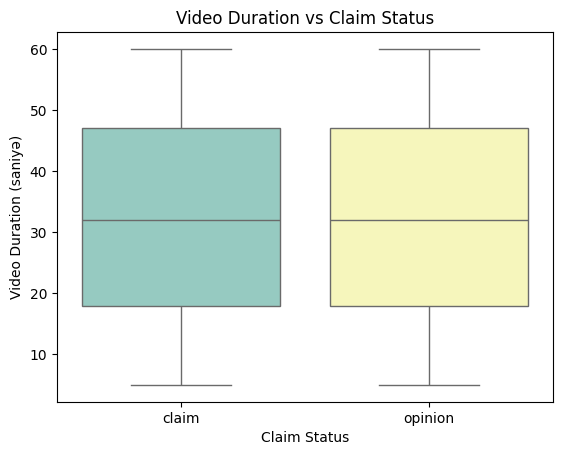

In [89]:
sns.boxplot(data=df, x='claim_status', y='video_duration_sec', palette='Set3')
plt.title('Video Duration vs Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Video Duration (saniyə)')
plt.show()


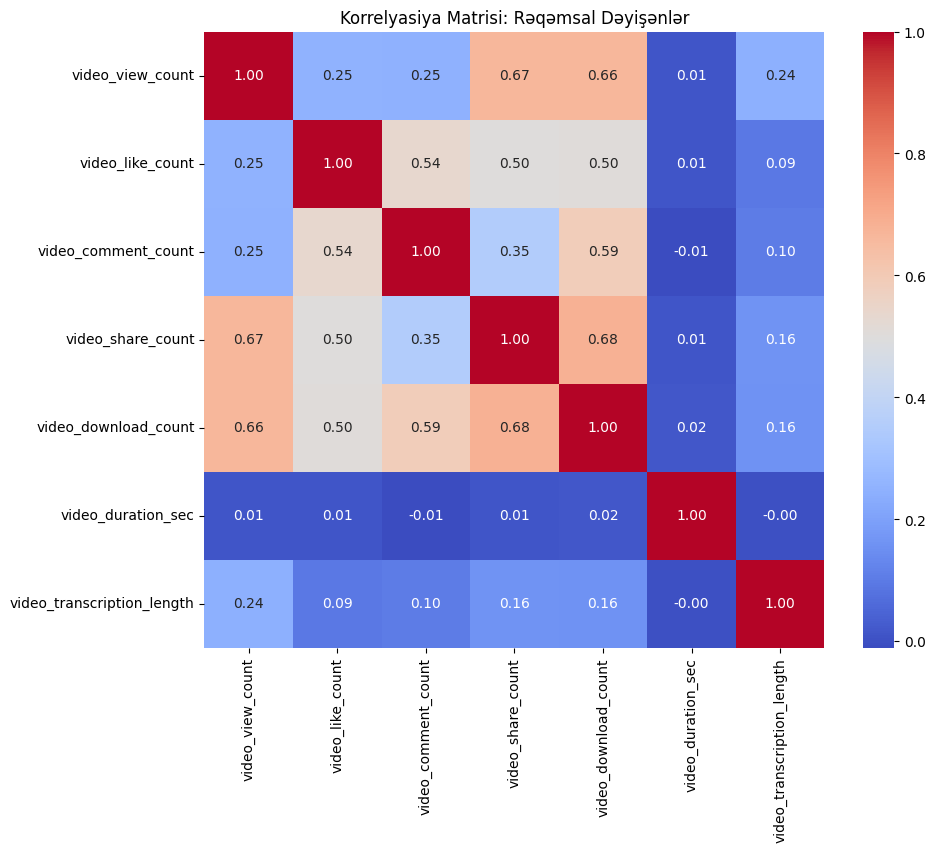

In [90]:
# Rəqəmsal dəyişənləri seç
numeric_cols = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count','video_duration_sec','video_transcription_length']

# Korrelyasiya matrisi
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelyasiya Matrisi: Rəqəmsal Dəyişənlər')
plt.show()


In [91]:
numeric_cols = ['video_view_count', 'video_like_count', 'video_comment_count',
                'video_share_count', 'video_download_count']

for x in numeric_cols:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

In [92]:
# Sadəcə lazım olan sütunlarda NaN olmayan sətirləri saxla
df = df.dropna(subset=['claim_status', 'verified_status', 'author_ban_status'])

# claim → 1, digər hər şey → 0
df['claim_status'] = df['claim_status'].apply(lambda x: 1 if x == 'claim' else 0)

# Lazımsız sütunları sil
df = df.drop(columns=['#', 'video_id', 'video_transcription_text'], errors='ignore')

# Yenə də NaN qalmışsa sil
df = df.dropna()

# Categorical sütunları dummy formatına sal
df = pd.get_dummies(df, columns=['verified_status', 'author_ban_status'], drop_first=True)

# X və y təyin et
X = df.drop('claim_status', axis=1)
y = df['claim_status']

# Train-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)









In [93]:
# Miqyasla
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [94]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, log_pred))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_pred))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, gb_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1686
           1       1.00      0.94      0.97       577

    accuracy                           0.98      2263
   macro avg       0.99      0.97      0.98      2263
weighted avg       0.98      0.98      0.98      2263

Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1686
           1       1.00      0.98      0.99       577

    accuracy                           0.99      2263
   macro avg       1.00      0.99      0.99      2263
weighted avg       0.99      0.99      0.99      2263

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1686
           1       0.99      0.98      0.98       577

    accuracy                           0.99      2263
   macro avg       0.99      0.99      0.99      2263
weighted avg    

In [95]:
# Qiymətləndirmə
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1686
           1       0.25      1.00      0.41       577

    accuracy                           0.25      2263
   macro avg       0.13      0.50      0.20      2263
weighted avg       0.07      0.25      0.10      2263



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\m